https://robustness.readthedocs.io/en/latest/example_usage/custom_imagenet.html#requirements-setup

In [1]:
# if needed
# !pip install robustness==1.1  # (or 1.1.post2)

In [2]:
##########
# TODO
# set the path to ImageNet
in_path = "/path/to/ImageNet/"  # path to ImageNet
##########

# path to the directory that contains
# imagenet_class_index.json, wordnet.is_a.txt, words.txt
in_info_path = "../src/dataset/info/"  # needed for custom imagenet

In [3]:
from robustness import datasets
from robustness.tools.imagenet_helpers import common_superclass_wnid, ImageNetHierarchy

in_hier = ImageNetHierarchy(in_path, in_info_path)
superclass_wnid = common_superclass_wnid("geirhos_16")  # 16-class-imagenet
class_ranges, label_map = in_hier.get_subclasses(superclass_wnid, balanced=True)

custom_dataset = datasets.CustomImageNet(in_path, class_ranges)

train_loader, test_loader = custom_dataset.make_loaders(workers=10, batch_size=5)

print(f"Train set size: {len(train_loader.dataset.targets)}")
print(f"Test set size: {len(test_loader.dataset.targets)}")

==> Preparing dataset custom_imagenet..
Train set size: 40517
Test set size: 1600


In [4]:
train_loader.dataset.transform.transforms

[RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR),
 RandomHorizontalFlip(p=0.5),
 ColorJitter(brightness=[0.9, 1.1], contrast=[0.9, 1.1], saturation=[0.9, 1.1], hue=None),
 ToTensor(),

torch.Size([5, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


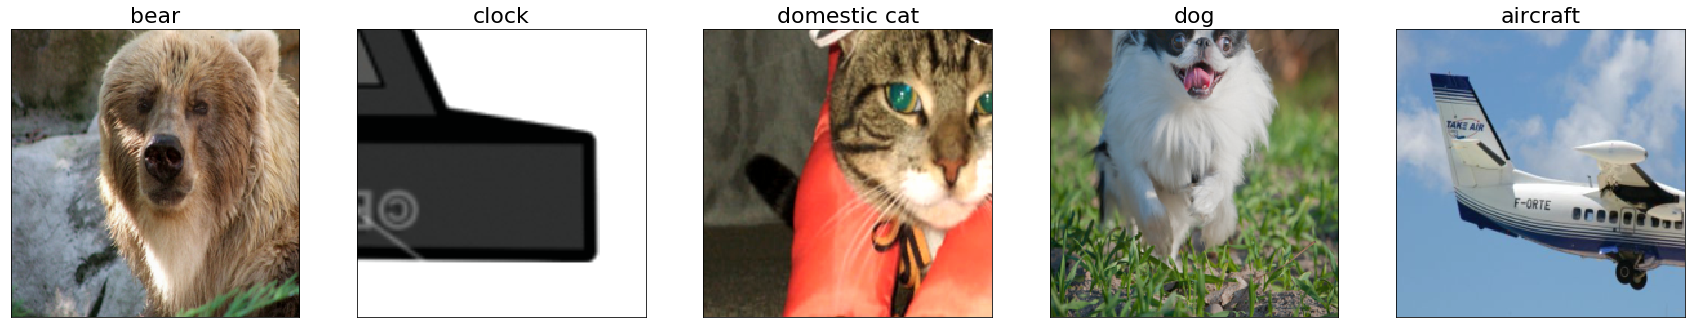

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([5, 3, 224, 224])


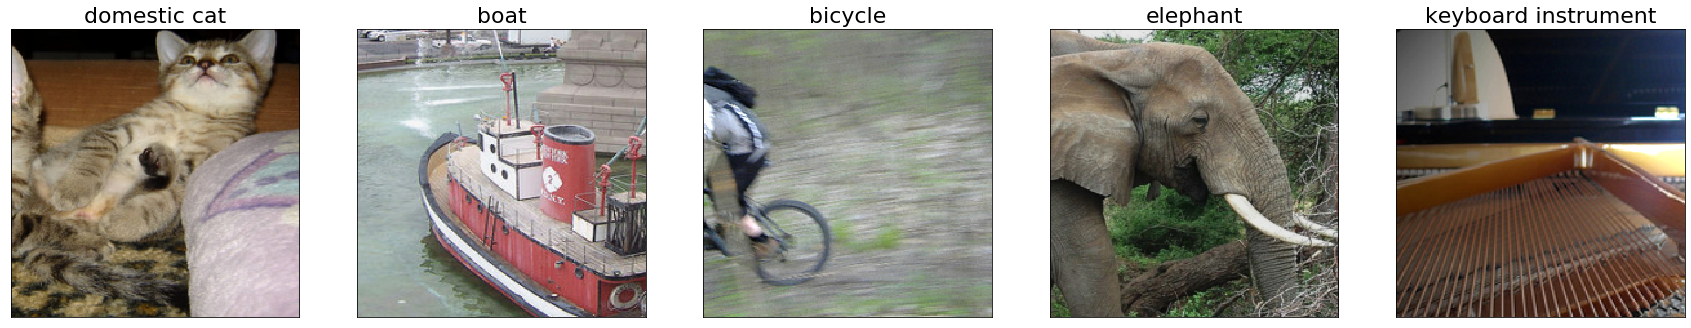

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([5, 3, 224, 224])


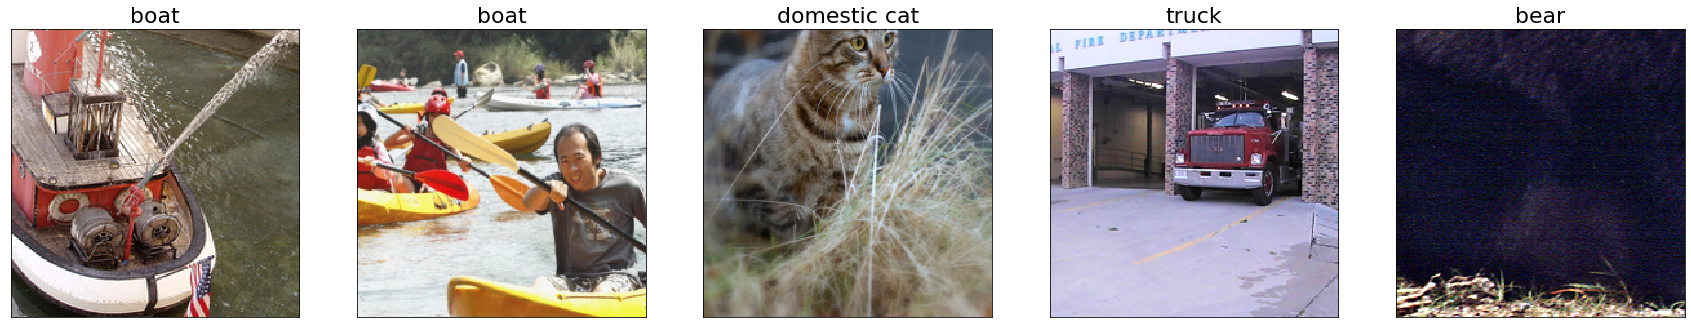

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([5, 3, 224, 224])


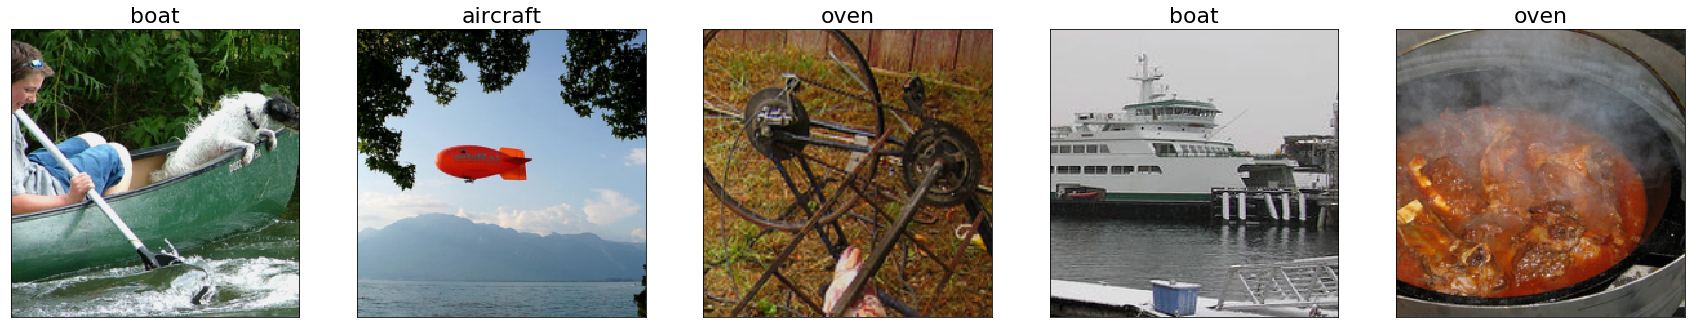

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([5, 3, 224, 224])


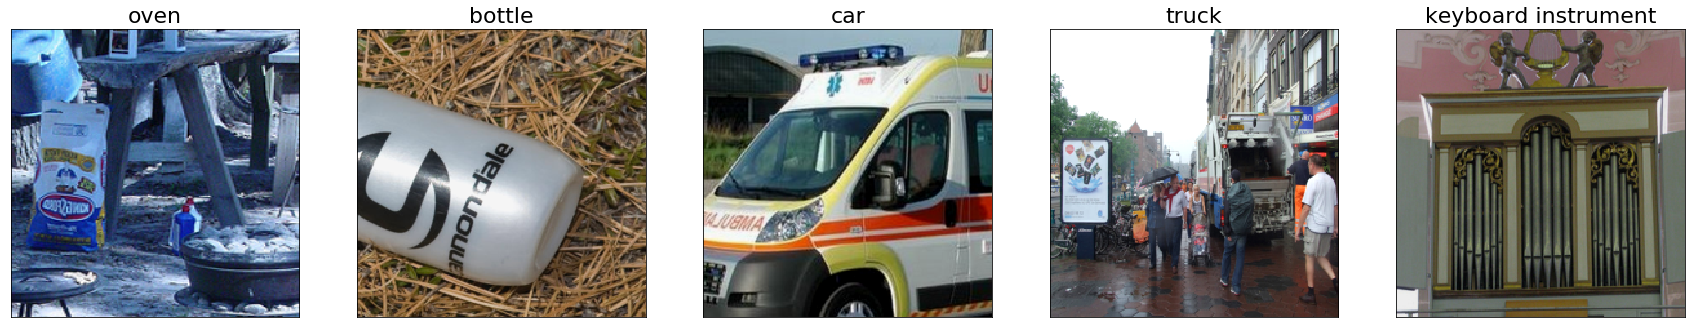

In [5]:
from robustness.tools.vis_tools import show_image_row

%matplotlib inline

iterator = enumerate(train_loader)

for _ in range(5):
    _, (im, lab) = next(iterator)

    print(im.shape)

    show_image_row(
        [im],
        tlist=[[label_map[int(k)].split(",")[0] for k in lab]],
        size=(6, 6),
        fontsize=22,
    )

In [6]:
# add normalize object to dataloader
import torchvision.transforms as transforms

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
train_loader.dataset.transform.transforms.append(normalize)

In [7]:
train_loader.dataset.transform.transforms

[RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR),
 RandomHorizontalFlip(p=0.5),
 ColorJitter(brightness=[0.9, 1.1], contrast=[0.9, 1.1], saturation=[0.9, 1.1], hue=None),
 ToTensor(),
 Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]